# Table of Content
01. Import Libraries
02. Import Data
03. Finding Mixed-type Data
04. Data Accuracy
05. Finding Missing Values
06. Finding Duplicates
07. Export Data

# 01. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [2]:
# Define the main project folder path
path = r'C:\Users\saich\Desktop\CareerFoundry\Data Immersion\Achievement 4 Python Fundamentals for Data Analysts\04-2023 Instacart Basket Analysis (github)'

In [3]:
# Import 'products' data set from 'Original Data' folder
prods = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'products.csv'), index_col = False)

In [4]:
prods.head()

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3


In [5]:
prods.shape

(49693, 5)

# 03. Finding Mixed-type Data

In [6]:
# Check for any mixed-type columns - no output means no mixed-type data
for col in prods.columns.tolist():
    weird = (prods[[col]].applymap(type) != prods[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (prods[weird]) > 0:
        print (col)

product_name


The 'product_name' column contains mixed-type data. It is supposed to contain strings. 

In [7]:
# Check if 'product_name' columns contains any null (missing) values since null values are floats
prods['product_name'].isnull().sum()

16

There are 16 null values in 'product_name' column. As null values are floats in nature, this causes 'product_name' column to contain mixed-type data. 

These null values will be handled in '05. Finding Missing Values' section. After that, the mixed-type data checking will be done again on 'product_name' column. 

# 04. Data Accuracy

In [8]:
# Check the descriptive statistics for numerical data
prods.describe()

,product_id,aisle_id,department_id,prices
count,49693.000000,49693.000000,49693.000000,49693.000000
mean,24844.345139,67.770249,11.728433,9.994136
std,14343.717401,38.316774,5.850282,453.519686
min,1.000000,1.000000,1.000000,1.000000
25%,12423.000000,35.000000,7.000000,4.100000
50%,24845.000000,69.000000,13.000000,7.100000
75%,37265.000000,100.000000,17.000000,11.200000
max,49688.000000,134.000000,21.000000,99999.000000


The maximum price value is \\$99999, which is not reasonable. 

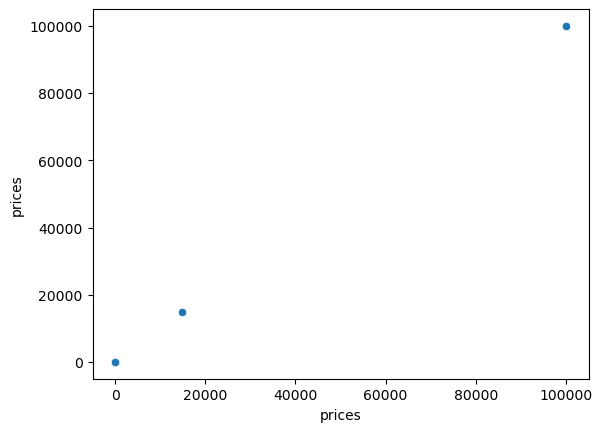

In [9]:
# Make a scatterplot to check how many unusual price values. 
prods_price_scatter = sns.scatterplot(data = prods, x = 'prices', y = 'prices')

From the scatterplot above, there are two unusual price values. One is around \\$20000, another one is around \\$100000. 

In [10]:
# Take a look on the unusual price values
prods.loc[prods['prices']>100]

,product_id,product_name,aisle_id,department_id,prices
21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
33666,33664,2 % Reduced Fat Milk,84,16,99999.0


In [11]:
# Create a 'prods_clean' dataframe that excludes the extreme prices
prods_clean = prods.loc[prods['prices'] <= 100]

In [12]:
# Verify the changes
prods_clean.describe()

,product_id,aisle_id,department_id,prices
count,49691.000000,49691.000000,49691.000000,49691.000000
mean,24844.233885,67.769113,11.728261,7.682268
std,14343.943895,38.317051,5.850337,4.200242
min,1.000000,1.000000,1.000000,1.000000
25%,12422.500000,35.000000,7.000000,4.100000
50%,24845.000000,69.000000,13.000000,7.100000
75%,37265.500000,100.000000,17.000000,11.200000
max,49688.000000,134.000000,21.000000,25.000000


The statistics of 'prices' column is now reasonable. 

In [13]:
prods_clean.shape

(49691, 5)

# 05. Finding Missing Values

In [14]:
# Check for missing values
prods_clean.isnull().sum()

product_id        0
product_name     16
aisle_id          0
department_id     0
prices            0
dtype: int64

There are 16 missing values in 'product_name' column. 

In [15]:
# Take a look at the missing values
prods_clean.loc[prods_clean['product_name'].isnull() == True]

,product_id,product_name,aisle_id,department_id,prices
33,34,NaN,121,14,12.2
68,69,NaN,26,7,11.8
115,116,NaN,93,3,10.8
261,262,NaN,110,13,12.1
525,525,NaN,109,11,1.2
1511,1511,NaN,84,16,14.3
1780,1780,NaN,126,11,12.3
2240,2240,NaN,52,1,14.2
2586,2586,NaN,104,13,12.4
3159,3159,NaN,126,11,13.1


In [16]:
# Create a new dataframe to filter out the missing values in 'product_name' column -- as per instruction in the course
prods_clean_2 = prods_clean.loc[prods_clean['product_name'].isnull() == False]

In [17]:
# Verify the changes
prods_clean_2.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
prices           0
dtype: int64

In [18]:
prods_clean_2.shape

(49675, 5)

It is exactly 16 rows lesser after removing the missing values. 

In [19]:
# As mentioned earlier, mixed-type data checking will be done again after handling the missing values in 'product_name' column
# No output means no mixed-type data
for col in prods_clean_2.columns.tolist():
    weird = (prods_clean_2[[col]].applymap(type) != prods_clean_2[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (prods_clean_2[weird]) > 0:
        print (col)

After removing the missing values, there are no mixed-type data in 'prods_clean_2' dataframe.

# 06. Finding Duplicates

In [20]:
# Check for duplicates
prods_clean_2.duplicated().sum()

5

In [21]:
prods_clean_2.loc[prods_clean_2.duplicated()]

,product_id,product_name,aisle_id,department_id,prices
462,462,Fiber 4g Gummy Dietary Supplement,70,11,4.8
18459,18458,Ranger IPA,27,5,9.2
26810,26808,Black House Coffee Roasty Stout Beer,27,5,13.4
35309,35306,Gluten Free Organic Peanut Butter & Chocolate ...,121,14,6.8
35495,35491,Adore Forever Body Wash,127,11,9.9


In [22]:
# Create a new dataframe to filter out the duplicates
prods_clean_3 = prods_clean_2.drop_duplicates()

In [23]:
# Verify the changes
prods_clean_3.duplicated().sum()

0

In [24]:
prods_clean_3.loc[prods_clean_3.duplicated()]

,product_id,product_name,aisle_id,department_id,prices


In [25]:
prods_clean_3.shape

(49670, 5)

It is exactly 5 rows lesser after removing the duplicates.

# 07. Export Data

In [26]:
# Export 'prods_clean_3' dataframe to 'Prepared Data' in csv format
prods_clean_3.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'products_checked.csv'))